Сначала заимпортим датасет с распарсенной афишей.

In [1]:
import pandas as pd
df = pd.DataFrame.from_csv("parsed_afisha.csv", sep=',', encoding='utf-8')
df.head()

,Name,Address,Metro,Rating,Money
0,Хлеб и вино,"просп. Вернадского, 94, корп. 8, ЖК «Миракс-парк»","Юго-Западная, Тропарево",NaN,2.0
1,Beer Happens,"Сретенка, 24/2, стр. 1",Сухаревская,9.1,2.0
2,Винный базар на Комсомольском,"Комсомольский просп., 14/1, корп. 2",Парк культуры,9.1,2.0
3,Grammy's,"Кутузовский просп., 2/1, стр. 6, в Конгресс-па...",Киевская,9.0,3.0
4,Mitzva Bar,"Пятницкая, 3/4, стр. 1","Новокузнецкая, Третьяковская",9.0,2.0


Занулим NaNы в столбце Rating. Имейте в виду: после зануления останется ещё много нанов в столбце Money.

In [2]:
df.Rating.fillna(0, inplace=True)

In [3]:
df.head(10)

,Name,Address,Metro,Rating,Money
0,Хлеб и вино,"просп. Вернадского, 94, корп. 8, ЖК «Миракс-парк»","Юго-Западная, Тропарево",0.0,2.0
1,Beer Happens,"Сретенка, 24/2, стр. 1",Сухаревская,9.1,2.0
2,Винный базар на Комсомольском,"Комсомольский просп., 14/1, корп. 2",Парк культуры,9.1,2.0
3,Grammy's,"Кутузовский просп., 2/1, стр. 6, в Конгресс-па...",Киевская,9.0,3.0
4,Mitzva Bar,"Пятницкая, 3/4, стр. 1","Новокузнецкая, Третьяковская",9.0,2.0
5,Боэми,"Рочдельская, 11/5","Краснопресненская, Баррикадная",9.0,3.0
6,Lumberjack Bar,"Б.Спасоглинищевский пер., 3, стр. 5",Китай-город,9.0,3.0
7,Бутчер,"Лубянский пр., 15/2",Китай-город,9.0,4.0
8,Лейка,"Головинское ш., 5, ТЦ «Водный», 3 этаж",Водный стадион,9.0,2.0
9,Pinzeria by Bontempi,"Б.Знаменский пер., 2, стр. 3",Кропоткинская,8.9,2.0


Заимпортим словарь метро -> район Москвы

In [4]:
import json

f = open("metro_to_district_dict.json","r")
json_str = f.read()
metro_to_district_dict = json.loads(json_str)
metro_to_district_dict

{'Авиамоторная': 'Лефортово',
 'Авиамоторная 2018 год': 'Лефортово',
 'Автозаводская': 'Даниловский',
 'Академическая': 'Академический',
 'Александровский сад': 'Арбат',
 'Алексеевская': 'Алексеевский',
 'Алма-Атинская': 'Братеево',
 'Алтуфьево': 'Бибирево',
 'Андроновка': 'Перово',
 'Аннино': 'Чертаново Южное',
 'Арбатская': 'Арбат',
 'Аэропорт': 'Аэропорт',
 'Бабушкинская': 'Бабушкинский',
 'Багратионовская': 'Филёвский Парк',
 'Балтийская': 'Войковский',
 'Баррикадная': 'Пресненский',
 'Бауманская': 'Басманный',
 'Беговая': 'Хорошёвский',
 'Белокаменная': 'Богородское',
 'Беломорская улица 2020 год': 'Левобережный',
 'Белорусская': 'Тверской',
 'Беляево': 'Коньково',
 'Бибирево': 'Бибирево',
 'Библиотека имени Ленина': 'Тверской',
 'Битцевский парк': 'Ясенево',
 'Борисово': 'Братеево',
 'Боровицкая': 'Арбат',
 'Ботанический сад': 'Свиблово',
 'Братиславская': 'Марьино',
 'Бульвар Дмитрия Донского': 'Северное Бутово',
 'Бульвар Рокоссовского': 'Богородское',
 'Бульвар адмирала Ушаков

Ваша первая задача: заменить столбец metro на столбец районов. Должно быть изи. Но могут возникнуть конфклиты: для данной станции метро не найдется в словаре соответсвия. Я бы скорее всего просто дропал такие случаи. 

Теперь заимпорчу материал по картам. 
Пользовался статьей
https://habrahabr.ru/company/ods/blog/338554/#habracut

Вот код оттуда. 

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

mo_gdf = gpd.read_file('./atd/mo.shp')
mo_gdf.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."


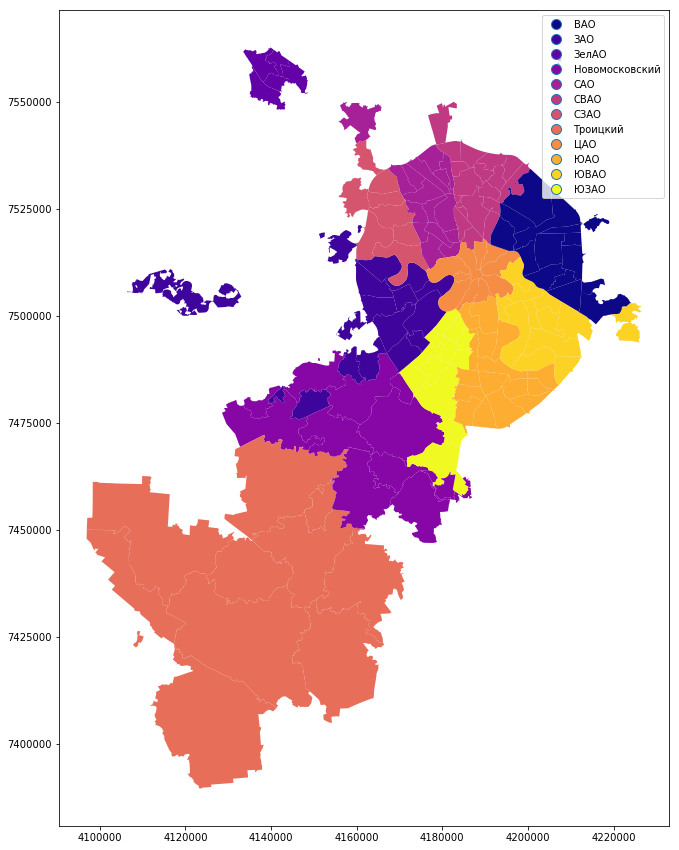

In [6]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
mo_gdf_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])

УДАЧИ!!!